In [1]:
import numpy as np

def GBM(mu, sigma, X0, T, tsteps, N):
    X = np.zeros(shape=(tsteps, N))
    dt = T/tsteps
    X[0, :] = X0
    epsilon = np.random.normal(size=(tsteps-1, N))
    X[1:, :] = np.exp((mu-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*epsilon)
    return np.cumprod(X, axis=0)

def GBMShifted(mu, sigma, shift, X0, T, tsteps, N):
    X0_shifted = X0 + shift
    if (X0_shifted < 0.0):
        raise ValueError('Shift is too small !')

    X_shifted = GBM(mu, sigma, X0_shifted, T, tsteps, N)
    return X_shifted - shift

In [2]:
N = 10000
tsteps = 500
T = 3.0
sigma = 0.2
L0 = -0.05
shift = 0.1

np.random.seed(4)
paths = GBMShifted(0.0, sigma, shift, L0, T, tsteps, N)

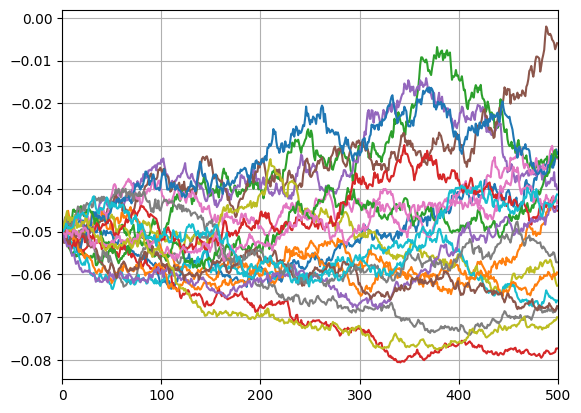

In [3]:
import matplotlib.pyplot as plt

plt.plot(paths[:, 0:20])
plt.xlim(0, tsteps)
plt.grid()
plt.show()

In [4]:
from scipy.stats import lognorm

def shifted_lognormal(x, mu, sigma, dt, shift):
    return lognorm.pdf(x+shift, scale = np.exp(np.log(mu+shift) + (-0.5*sigma**2)*dt), s=np.sqrt(dt)*sigma)

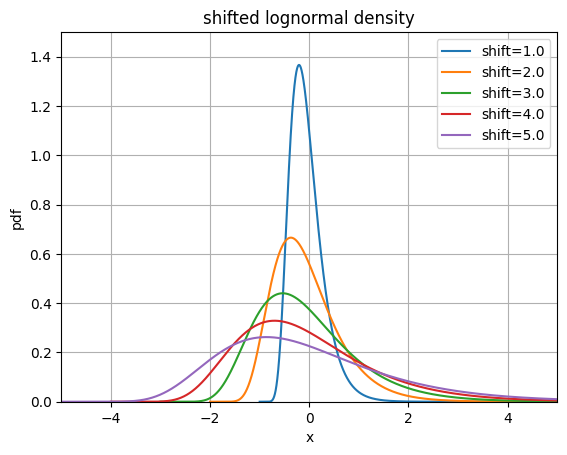

In [5]:
shiftV = [1.0, 2.0, 3.0, 4.0, 5.0]
legend = []
for shift in shiftV:
  x = np.arange(-shift, 5, 0.0001)
  pdf_x = shifted_lognormal(x, L0, sigma, T, shift)
  plt.plot(x, pdf_x)
  legend.append(f'shift={shift}')

plt.legend(legend)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('shifted lognormal density')
plt.ylim(0, 1.5)
plt.xlim(-5, 5)
plt.grid()
plt.show()

In [18]:
from scipy.stats import norm

def d_plus(St, K, r, sigma, ttm):
    num = np.log(St/K) + (r + 0.5*sigma**2)*(ttm)
    den = sigma*np.sqrt(ttm)
    return num/den

def d_minus(St, K, r, sigma, ttm):
    return d_plus(St, K, r, sigma, ttm) - sigma*np.sqrt(ttm)

def BS(St, K, r, sigma, ttm, option_type):
    if type(ttm) == list:
        ttm = np.array([t for t in ttm])
    else:
        ttm = ttm

    return (option_type*St*norm.cdf(option_type*d_plus(St, K, r, sigma, ttm)) - option_type*K*np.exp(-r*(ttm))*norm.cdf(option_type*d_minus(St, K, r, sigma, ttm)))

def BSShifted(St, K, shift, r, sigma, ttm, option_type):
    K_shifted = K + shift
    St_shifted = St + shift
    return BS(St_shifted, K_shifted, r, sigma, ttm, option_type)

In [19]:
np.random.seed(4)

N = 10000
tsteps = 500
T = 3
sigma = 0.2
L0 = -0.05
shift = 0.1

K = np.linspace(-shift, np.abs(L0)*3, 25)
optPriceMCV = np.zeros([len(K), 1])
for idx in range(len(K)):
  optPriceMCV[idx] = np.mean(np.maximum(paths[-1, :] - K[idx], 0.0))

optPriceExact = BSShifted(L0, K, shift, 0.0, sigma, T, 1)

C:\Users\t004672\AppData\Local\Temp\ipykernel_4724\2306484032.py:4: RuntimeWarning: divide by zero encountered in divide
  num = np.log(St/K) + (r + 0.5*sigma**2)*(ttm)


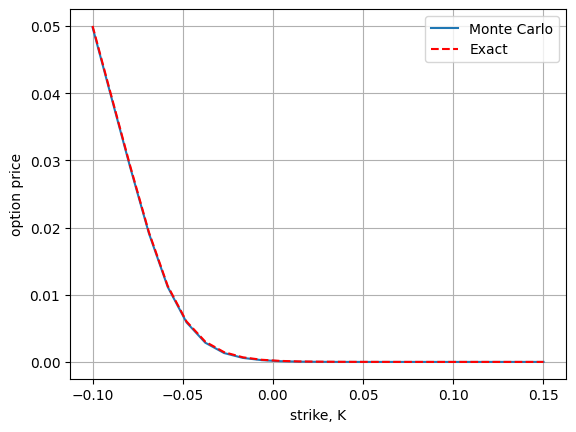

In [20]:
plt.plot(K, optPriceMCV)
plt.plot(K, optPriceExact, '--r')
plt.grid(True)
plt.xlabel('strike, K')
plt.ylabel('option price')
plt.legend(['Monte Carlo', 'Exact'])
plt.show()

C:\Users\t004672\AppData\Local\Temp\ipykernel_4724\2306484032.py:4: RuntimeWarning: divide by zero encountered in divide
  num = np.log(St/K) + (r + 0.5*sigma**2)*(ttm)


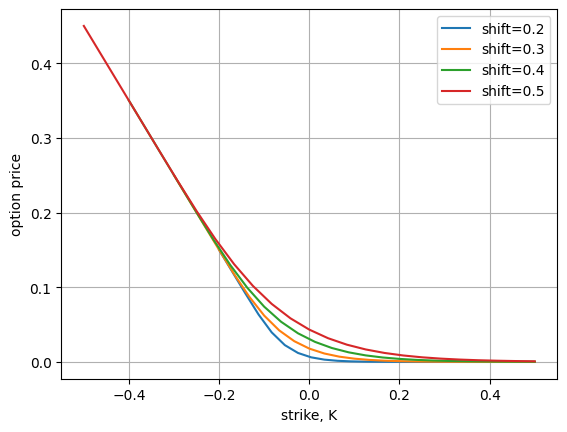

In [22]:
legend = []
for shift in [0.2, 0.3, 0.4, 0.5]:
  K = np.linspace(-shift, np.abs(L0)*10.0, 25)
  optPriceExact = BSShifted(L0, K, shift, 0.0, sigma, T, 1)
  plt.plot(K, optPriceExact)
  legend.append(f'shift={shift}')

plt.grid(True)
plt.xlabel('strike, K')
plt.ylabel('option price')
plt.legend(legend)
plt.show()